<a href="https://colab.research.google.com/github/eleven111101/Logistic_Regression01/blob/main/LoR_Gender_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [214]:
print("hello_world")

hello_world


In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [216]:
df=pd.read_csv("/content/gender_classification.csv")

In [217]:
df.head()

,hair_length,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,Gender
0,0CM,12.6,5.1,1.0,1.0,1.0,1.0,Male
1,33CM,12.2,5.1,0.0,0.0,0.0,1.0,Female
2,34CM,13.3,6.5,1.0,0.0,0.0,1.0,Female
3,42CM,13.4,6.1,0.0,0.0,0.0,0.0,Female
4,25CM,12.3,6.1,1.0,0.0,0.0,0.0,Female


In [218]:
df.head(10)

,hair_length,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,Gender
0,0CM,12.6,5.1,1.0,1.0,1.0,1.0,Male
1,33CM,12.2,5.1,0.0,0.0,0.0,1.0,Female
2,34CM,13.3,6.5,1.0,0.0,0.0,1.0,Female
3,42CM,13.4,6.1,0.0,0.0,0.0,0.0,Female
4,25CM,12.3,6.1,1.0,0.0,0.0,0.0,Female
5,38CM,12.1,6.1,0.0,0.0,0.0,0.0,Female
6,13CM,11.8,5.5,0.0,0.0,0.0,0.0,Female
7,4CM,13.4,6.7,1.0,1.0,1.0,1.0,Male
8,36CM,12.9,5.1,0.0,0.0,0.0,0.0,Female
9,9CM,11.5,6.0,1.0,1.0,1.0,1.0,Male


In [219]:
df.describe()

,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,13.170026,5.960388,0.50000,0.505600,0.502000,0.506200
std,1.072602,0.552536,0.50005,0.500019,0.500046,0.500012
min,11.400000,5.100000,0.00000,0.000000,0.000000,0.000000
25%,12.300000,5.500000,0.00000,0.000000,0.000000,0.000000
50%,13.100000,5.900000,0.50000,1.000000,1.000000,1.000000
75%,14.000000,6.400000,1.00000,1.000000,1.000000,1.000000
max,15.500000,7.100000,1.00000,1.000000,1.000000,1.000000


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hair_length                5001 non-null   object 
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5000 non-null   float64
 4   nose_long                  5000 non-null   float64
 5   lips_thin                  5000 non-null   float64
 6   distance_nose_to_lip_long  5000 non-null   float64
 7   Gender                     4987 non-null   object 
dtypes: float64(6), object(2)
memory usage: 312.7+ KB


In [221]:
df["hair_length"]

0        0CM
1       33CM
2       34CM
3       42CM
4       25CM
        ... 
4996     9CM
4997     0CM
4998     6CM
4999     2CM
5000    15CM
Name: hair_length, Length: 5001, dtype: object

In [222]:
df["hair_length"][1][:-2]

'33'

In [223]:
df["hair_length"].apply(lambda x : int(x[:-2]))

0        0
1       33
2       34
3       42
4       25
        ..
4996     9
4997     0
4998     6
4999     2
5000    15
Name: hair_length, Length: 5001, dtype: int64

In [224]:
df["hair_length"]=df["hair_length"].apply(lambda x : int(x[:-2]))

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hair_length                5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5000 non-null   float64
 4   nose_long                  5000 non-null   float64
 5   lips_thin                  5000 non-null   float64
 6   distance_nose_to_lip_long  5000 non-null   float64
 7   Gender                     4987 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 312.7+ KB


In [226]:
df.isnull().sum()

hair_length                   0
forehead_width_cm             0
forehead_height_cm            0
nose_wide                     1
nose_long                     1
lips_thin                     1
distance_nose_to_lip_long     1
Gender                       14
dtype: int64

In [227]:
null_values = df[df.isnull().any(axis=1)]
print(null_values)

      hair_length  forehead_width_cm  forehead_height_cm  nose_wide  \
46              9               13.7                 5.6        1.0   
289            35               11.5                 5.5        NaN   
660            30               14.2                 5.5        0.0   
1057            5               12.8                 5.4        1.0   
1682            5               12.4                 5.9        0.0   
1690           10               14.9                 6.3        0.0   
1738           42               11.4                 6.1        0.0   
1811           25               13.1                 5.1        0.0   
2297            3               14.7                 5.5        1.0   
2371            1               14.5                 5.9        1.0   
3058            2               14.5                 5.7        1.0   
3919           35               11.4                 6.0        0.0   
4646           35               13.4                 6.0        0.0   
4943  

In [228]:
df.dropna()

,hair_length,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,Gender
0,0,12.6,5.1,1.0,1.0,1.0,1.0,Male
1,33,12.2,5.1,0.0,0.0,0.0,1.0,Female
2,34,13.3,6.5,1.0,0.0,0.0,1.0,Female
3,42,13.4,6.1,0.0,0.0,0.0,0.0,Female
4,25,12.3,6.1,1.0,0.0,0.0,0.0,Female
...,...,...,...,...,...,...,...,...
4996,9,11.6,6.2,1.0,0.0,1.0,0.0,Female
4997,0,11.5,5.7,1.0,1.0,1.0,1.0,Male
4998,6,14.6,5.4,0.0,1.0,1.0,1.0,Male
4999,2,11.5,5.7,1.0,0.0,0.0,1.0,Male


In [229]:
df.isnull().sum()

hair_length                   0
forehead_width_cm             0
forehead_height_cm            0
nose_wide                     1
nose_long                     1
lips_thin                     1
distance_nose_to_lip_long     1
Gender                       14
dtype: int64

In [230]:
df.dropna(inplace=True)

In [231]:
df.describe()

,hair_length,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000
mean,17.563465,13.169902,5.961139,0.500301,0.506116,0.502105,0.506116
std,14.418997,1.072191,0.552838,0.500050,0.500013,0.500046,0.500013
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,12.300000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,13.100000,5.900000,1.000000,1.000000,1.000000,1.000000
75%,28.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,50.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4987 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hair_length                4987 non-null   int64  
 1   forehead_width_cm          4987 non-null   float64
 2   forehead_height_cm         4987 non-null   float64
 3   nose_wide                  4987 non-null   float64
 4   nose_long                  4987 non-null   float64
 5   lips_thin                  4987 non-null   float64
 6   distance_nose_to_lip_long  4987 non-null   float64
 7   Gender                     4987 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 350.6+ KB


In [233]:
df.isnull().sum()

hair_length                  0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
Gender                       0
dtype: int64

In [234]:
df.shape

(4987, 8)

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4987 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hair_length                4987 non-null   int64  
 1   forehead_width_cm          4987 non-null   float64
 2   forehead_height_cm         4987 non-null   float64
 3   nose_wide                  4987 non-null   float64
 4   nose_long                  4987 non-null   float64
 5   lips_thin                  4987 non-null   float64
 6   distance_nose_to_lip_long  4987 non-null   float64
 7   Gender                     4987 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 350.6+ KB


In [236]:
df["Gender"].apply(lambda x: 1 if x=="Male" else 0)

0       1
1       0
2       0
3       0
4       0
       ..
4996    0
4997    1
4998    1
4999    1
5000    0
Name: Gender, Length: 4987, dtype: int64

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4987 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hair_length                4987 non-null   int64  
 1   forehead_width_cm          4987 non-null   float64
 2   forehead_height_cm         4987 non-null   float64
 3   nose_wide                  4987 non-null   float64
 4   nose_long                  4987 non-null   float64
 5   lips_thin                  4987 non-null   float64
 6   distance_nose_to_lip_long  4987 non-null   float64
 7   Gender                     4987 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 350.6+ KB


In [238]:
# df.corr()

In [239]:
# plt.figure(figsize=(10,8))
# sns.heatmap(df.corr(),annot=True)

In [240]:
X =df.drop("Gender",axis=1)
Y = df["Gender"]

In [241]:
from sklearn.model_selection import train_test_split

In [242]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [243]:
X_train.shape , Y_train.shape

((3989, 7), (3989,))

In [244]:
X_test.shape , Y_test.shape

((998, 7), (998,))

In [245]:
from sklearn.preprocessing import StandardScaler

In [246]:
scaler = StandardScaler()

In [247]:
scaler.fit(X_train)

StandardScaler()

In [248]:
X_train = scaler.transform(X_train)

In [249]:
X_test = scaler.transform(X_test)

In [250]:
X_test

array([[-0.39203573, -0.99741817, -1.1896955 , ...,  0.99176119,
         1.00427084,  0.99974934],
       [ 2.23392802, -1.27820159, -1.37093959, ..., -1.00830725,
        -0.99574732, -1.00025072],
       [-0.66845296, -1.18460712, -1.55218368, ...,  0.99176119,
         1.00427084,  0.99974934],
       ...,
       [-1.15218313, -0.5294458 ,  0.07901316, ...,  0.99176119,
         1.00427084,  0.99974934],
       [-0.46114004, -1.55898501, -1.37093959, ...,  0.99176119,
         1.00427084,  0.99974934],
       [-0.39203573,  1.06166025,  1.16647772, ...,  0.99176119,
         1.00427084, -1.00025072]])

In [251]:
from sklearn.linear_model import LogisticRegression

In [252]:
model = LogisticRegression()

In [253]:
model.fit(X_train,Y_train)

LogisticRegression()

In [254]:
prediction = model.predict(X_test)

In [256]:
np_Y_test=Y_test

In [257]:
np_Y_test

3763      Male
1540    Female
1666      Male
1079    Female
4212    Female
         ...  
4301      Male
4040    Female
4916      Male
192       Male
4877      Male
Name: Gender, Length: 998, dtype: object

In [258]:
from sklearn.metrics import confusion_matrix , accuracy_score ,classification_report

In [259]:
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

      Female       0.99      0.99      0.99       482
        Male       0.99      0.99      0.99       516

    accuracy                           0.99       998
   macro avg       0.99      0.99      0.99       998
weighted avg       0.99      0.99      0.99       998



In [260]:
accuracy_score(Y_test,prediction)

0.9929859719438878

In [261]:
confusion_matrix(Y_test,prediction)

array([[478,   4],
       [  3, 513]])

In [264]:
df["Gender"]=df["Gender"].apply(lambda x : int(1 if x=="Male" else 0))

In [265]:
df["Gender"]

0       1
1       0
2       0
3       0
4       0
       ..
4996    0
4997    1
4998    1
4999    1
5000    0
Name: Gender, Length: 4987, dtype: int64

In [266]:
df.corr()

,hair_length,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,Gender
hair_length,1.000000,-0.198873,-0.189137,-0.527393,-0.545162,-0.548734,-0.534980,-0.723343
forehead_width_cm,-0.198873,1.000000,0.086152,0.205517,0.202828,0.197203,0.209113,0.279498
forehead_height_cm,-0.189137,0.086152,1.000000,0.196145,0.223605,0.195094,0.204813,0.274688
nose_wide,-0.527393,0.205517,0.196145,1.000000,0.556882,0.561663,0.557684,0.747744
nose_long,-0.545162,0.202828,0.223605,0.556882,1.000000,0.570078,0.577238,0.760231
lips_thin,-0.548734,0.197203,0.195094,0.561663,0.570078,1.000000,0.552431,0.756172
distance_nose_to_lip_long,-0.534980,0.209113,0.204813,0.557684,0.577238,0.552431,1.000000,0.748199
Gender,-0.723343,0.279498,0.274688,0.747744,0.760231,0.756172,0.748199,1.000000


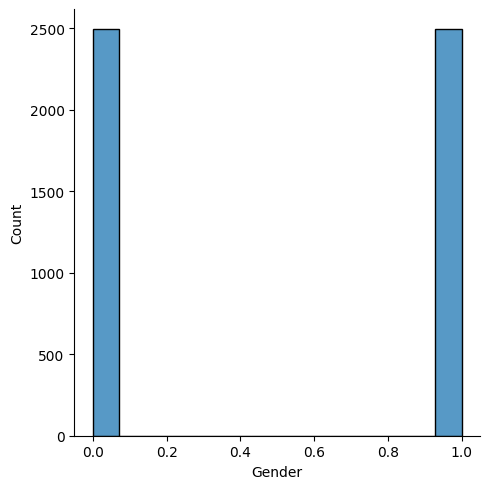

In [267]:
sns.displot(df["Gender"])

<Axes: >

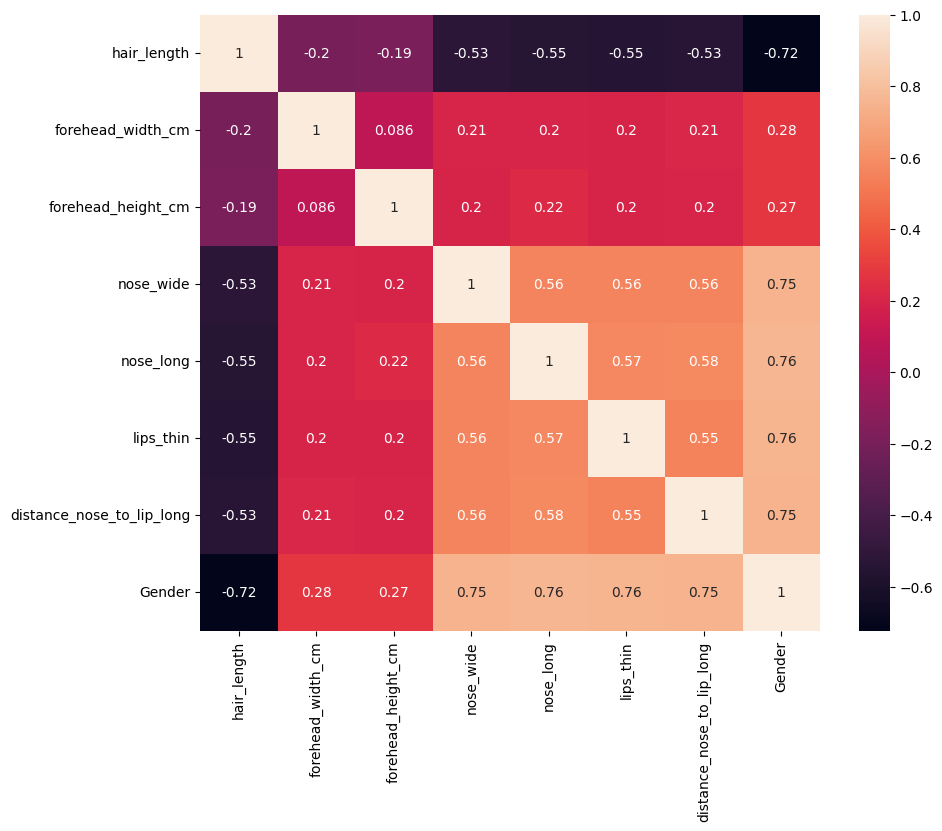

In [269]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)